### Basic Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<br>
____________________________________________________________________________________________________________________________

### Getting Data

In [8]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup


finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table



#---------------------------------------------------------------------
### This was just a dummy for amazon    
# print(news_tables)
# amzn_data = news_tables['AMZN']

# # FindAll in BeautifulSoup
# amzn_rows = amzn_data.findAll('tr')

# for index, row in enumerate(amzn_rows):
#     title = row.a.text
#     timestamp = row.td.text
#     print(timestamp+" "+title)
#---------------------------------------------------------------------

parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df['date'] = pd.to_datetime(df.date).dt.date

In [9]:
df.head()

,ticker,date,time,title
0,AMZN,2021-02-21,04:01PM,Elizabeth Warren's Economic Plan: Break Things...
1,AMZN,2021-02-21,09:43AM,UPS's E-Commerce Growth Is Here to Stay
2,AMZN,2021-02-21,09:20AM,5 Reasons Datadog's Post-Earnings Dip Is a Buy...
3,AMZN,2021-02-21,08:56AM,Could Walmart Be a Millionaire-Maker Stock?
4,AMZN,2021-02-21,08:00AM,New York Sues Amazon for Mishandling Coronavir...


In [10]:
df.shape

(300, 4)

In [12]:
df.ticker.unique()

array(['AMZN', 'GOOG', 'FB'], dtype=object)

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

<Figure size 720x576 with 0 Axes>

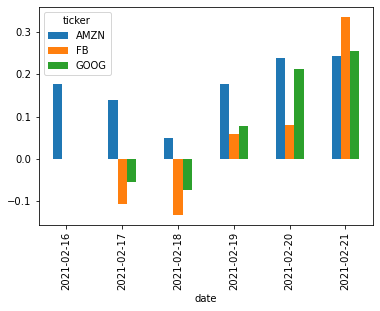

In [15]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()